In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

In [3]:
# Membaca data dari file Excel
datasets = pd.read_excel('dataKasus-1.xlsx')

# Menghapus kolom yang tidak diperlukan
datasets = datasets.drop(columns=['Unnamed: 12'])

# Membersihkan nama kolom
datasets.columns = datasets.columns.str.strip()

# Menampilkan informasi awal
datasets.info()

# Menampilkan jumlah nilai NaN
print(datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
dtypes: int64(2), object(10

In [5]:
# Preprocessing kolom 'USIA'
datasets['USIA'] = datasets['USIA'].fillna('').str.extract('(\d+)')[0].astype(float)
datasets['USIA'].fillna(datasets['USIA'].mean(), inplace=True)

In [7]:
# Preprocessing kolom 'JARAK KELAHIRAN'
imputer = SimpleImputer(strategy='most_frequent')
datasets['JARAK KELAHIRAN'] = imputer.fit_transform(datasets[['JARAK KELAHIRAN']]).ravel()
datasets['JARAK KELAHIRAN'] = datasets['JARAK KELAHIRAN'].replace('> 2 tahun ', '> 2 tahun')

In [9]:
# Preprocessing kolom 'RIW PE'
datasets['RIW PE'] = datasets['RIW PE'].replace(
    ['PEB', 'PE', 'HELLP SYNDROM', 'Impending PE', 'Impending Eklamsia', 'PE, HELLP Syndrome', 
     'PEB impending eklampsi', 'Impending Ekalmsia', 'Kejang Konvulsi', 'impending eklamsia'], 'Ada')

In [11]:
# Menstandarkan kategori target
datasets['PE/Non PE'] = datasets['PE/Non PE'].replace(
    ['PEB', 'PE', 'Eklamsia', 'PE gemelli', 'PEB impending eklampsi', 'PE '], 'PE')

In [13]:
# Label encoding untuk kolom target
label_encoder = LabelEncoder()
datasets['PE/Non PE'] = label_encoder.fit_transform(datasets['PE/Non PE'])

In [15]:
# One-hot encoding untuk kolom-kolom kategorikal
columns_to_encode = ['RIW HIPERTENSI', 'RIW PE', 'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA', 'SOSEK RENDAH']
encoder = OneHotEncoder(sparse_output=False)

for col in columns_to_encode:
    one_hot_encoded = encoder.fit_transform(datasets[[col]])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([col]))
    datasets = pd.concat([datasets.drop(col, axis=1), one_hot_df], axis=1)

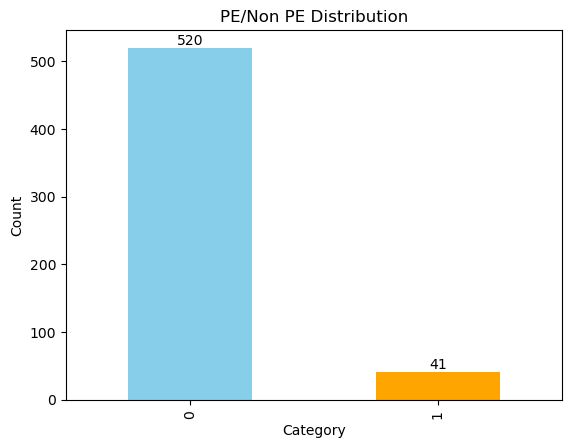

In [17]:
# Menampilkan distribusi target
value_counts = datasets['PE/Non PE'].value_counts()
ax = value_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('PE/Non PE Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
for i, count in enumerate(value_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')
plt.show()